# Analisando os dados da Olist

Para a nossa segunda parte da aula, iremos trabalhar em cima de uma base de dados disponibilizada pela Olist, uma empresa de e-commerce. Essa base de dados
é composta por 9 tabelas, conforme o seguinte esquema:

![](banco_de_dados_olist.png)

Essa base de dados é uma base menos "limpa" e é o que mais se aproxima da análise de dados do dia-a-dia de uma pessoa que trabalha com dados no mundo corporativo. Com essas tabelas, precisaremos demais manipulações de dados de forma mais minuciona que aquela que fizemos pela manhã. Vamos lá!

Para ter acesso à base de dados, acesse: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


# Coleta dos Dados

Nossa base de dados da Olist é composta por 9 tabelas diferentes, nelas temos informações de:
- pedidos (olist_orders_dataset)
- itens dos pedidos (olist_order_items_dataset)
- review dos usuários sobre os pedidos (olist_order_reviews_dataset)
- detalhes de pagamento dos pedidos (olist_order_payments_dataset)
- detalhes do consumidor que fez os pedidos (olist_customers_dataset)
- detalhes de geolocalização do consumidor (olist_geolocation_dataset)
- detalhes dos produtos (olist_products_dataset)
- detalhes dos vendedores (olist_sellers_dataset)

Nesta aula, iremos focar em três datasets, o de pedidos (olist_orders_dataset), itens do pedido (olist_order_items_dataset) e o de consumidor (olist_customers_dataset). Vamos lá!

In [29]:
import pandas as pd

In [30]:
df_pedidos = pd.read_csv('datasets_olist/olist_orders_dataset.csv')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Para a tabela de pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido
- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de consumidor
- **order_status**: Status do pedido
- **order_purchase_timestamp**: timestamp do horário que a compra foi feita
- **order_delivered_customer_date**: timestamp do horário que a compra foi entregue ao cliente

In [31]:
df_itens_pedido = pd.read_csv('datasets_olist/olist_order_items_dataset.csv')
df_itens_pedido

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


Para a tabela de itens dos pedidos, iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido. Será a nossa chave com a tabela de pedidos
- **product_id**: Identificador do produto
- **seller_id**: Identificador do vendedor
- **shipping_limit_date**: timestamp limite para a entrega do pedido
- **price**: valor do pedido
- **freight_value**: valor do frete

In [32]:
df_consumidor = pd.read_csv('datasets_olist/olist_customers_dataset.csv')
df_consumidor

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Para a tabela de consumidor, iremos utilizar as seguintes colunas:

- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de pedidos. 
- **customer_state**: Estado
- **customer_city**: Cidade

# Objetivo da nossa Análise Exploratória:

Lembra que pela manhã comentamos a necessidade de estabelecer nossas perguntas para direcionar nossas análises? Para essa segunda parte da aula, buscaremos responder perguntas simples com base nessas 3 tabelas:

- Qual a frequência de compra dos clientes na plataforma da Olist no ano de 2017?
- Qual é o valor médio das compras desses clientes?  
- O número de vendas varia de acordo com a época do ano?
- O tempo limite de entrega das compras está sendo respeitado?

# Limpando os dados da Olist

## Pedidos

In [33]:
# Vamos entender um pouquinho melhor dos nossos dados
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Estamos lidando com um dataset relativamente grande, com quase 100.000 linhas. Temos dados nulos nas colunas de data,
o que faz sentido, pois nem todo o pedido realizado foi devidamente pago e finalizado, então aqueles pedidos que por algum motivo não foram finalizados. Por isso, algumas informações não estarão disponíveis. Por exemplo: um pedido que teve o pagamento negado, não terá dados de entrega. 

In [34]:
# Vamos começar nossa limpeza filtrando somente as colunas que desejamos utilizar
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [35]:
# Agora iremos filtrar somente aqueles pedidos que foram finalizados, mas antes é importante entender todos os status disponíveis que temos na base
df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [36]:
# filtrando apenas os pedidos que foram entregues
df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [37]:
# Filtrando somente pedidos finalizados, percebemos que perdemos um número razoável de linhas, cerca de 3 mil.
# Agora, com nosso dataset filtrado, precisamos resetar o seu index:
df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54


In [38]:
# Para fecharmos a limpeza dessa tabela, precisamos criar uma coluna de mês! Uma das perguntas que precisamos responder é se existe sazonalidade
# nas vendas, então, criar uma coluna de mês irá facilitar bastante nosso trabalho na etapa de análise:

# Vamos transformar nossas colunas de data (que estão como string) em data: 
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])

# Agora sim, vamos criar uma coluna de mês!
df_pedidos['reference_month'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m-01')
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01
...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-01
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01


## Itens do Pedido

In [39]:
# Vamos entender um pouquinho melhor dos nossos dados
df_itens_pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Estamos lidando com um dataset um pouco maior que o de pedidos, o que faz sentido, pois nossa informação aqui está a nível de item, e um pedido pode ter 1 ou mais itens. Não temos dados nulos nessa tabela, mas isso não significa que aqui constam somente pedidos confirmados, tá? Precisaremos filtrá-los em breve. 

## Consumidor

In [40]:
# Vamos entender um pouquinho melhor dos nossos dados
df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [41]:
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)
df_consumidor

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


## Juntando os três datasets

Agora que fizemos a limpeza dos nossos três datasets, chegou a hora de juntarmos de acordo com a coluna em comum em cada um deles. Um ponto importante 
aqui é que queremos manter as informações que correspondem somente à pedidos **finalizados**. 

Para unir os 3 datasets usaremos a função merge(), precisamos entender qual é a coluna em comum entre os 3: no nosso caso, serão as colunas customer_id e order_id. 



In [42]:
# Por padrão é realizado o merge dos dados com o inner join
# Jutando os df pedidos e itens de pedidos
df_olist = pd.merge(df_pedidos, df_itens_pedido, on='order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [43]:
# Jutando agora com os dados de consumidor
df_olist = pd.merge(df_olist, df_consumidor, on='customer_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,11722,praia grande,SP
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,45920,nova vicosa,BA
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ


In [44]:
# Exportando a base final (p/ encaminhar para as alunas)
df_olist.to_csv('base_final_s14_olist.csv', index=False)

# Analisando os dados

Agora chegou a hora de respondermos as perguntas que estipulamos no começo dessa análise:
- Qual é o valor médio das compras desses clientes?  
- O número de vendas varia de acordo com a época do ano?
- O tempo limite de entrega das compras está sendo respeitado?

### Qual é o valor médio das compras desses clientes? E qual o valor médio pago em frete?


In [49]:





















































































































































































































































































































































































































































# Aqui estamos buscando uma estatística descritiva, podemos utilizar a nossa função describe() para trazer essas informações
df_olist.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,110197,2018-01-02 02:49:51.928346368,2016-09-15 12:16:38,2017-09-15 06:32:42,2018-01-21 10:11:55,2018-05-05 16:03:59,2018-08-29 15:00:37,NaN
order_delivered_customer_date,110189,2018-01-14 13:59:34.689261056,2016-10-11 13:46:32,2017-09-26 20:15:35,2018-02-02 21:05:09,2018-05-15 20:14:33,2018-10-17 13:22:46,NaN
order_item_id,110197.0,1.198181,1.0,1.0,1.0,1.0,21.0,0.706676
price,110197.0,119.980563,0.85,39.9,74.9,134.17,6735.0,182.299446
freight_value,110197.0,19.948598,0.0,13.08,16.26,21.15,409.68,15.698136
customer_zip_code_prefix,110197.0,35155.346888,1003.0,11310.0,24344.0,59066.0,99980.0,29901.148745


Apesar de termos pedidos com valores bem altos, como o caso do pedido no valor de R$ 6735, a média dos pedidos está cerca de 120 reais. O frete segue o mesmo padrão, sendo cerca de 10% do valor do pedido. 

Fazendo uma análise adicional aqui, pela coluna order_item_id, conseguimos observar a quantidade de itens que temos dentro de um pedido. A média de cada um desses pedidos é ter cerca de 1,2 itens. Sendo o seu máximo, um pedido que possui 21 itens iguais. 

### O número de vendas varia de acordo com a época do ano?

![](calendario-sazonalidades.jpg)
Fonte: https://pagar.me/blog/como-lidar-com-a-sazonalidade-de-vendas-no-e-commerce/


As sazonalidades podem ser positivas ou negativas, e essa imagem pode nos ajudar a interpretar nossos dados.

In [46]:
# Agora, vamos fazer uma análise de sazonalidade. Será que o número de vendas aumenta ou diminui de acordo com a época do ano?
df_sazonalidade = df_olist.groupby('reference_month').agg({'order_id': 'nunique'})
df_sazonalidade.sort_values(by='order_id', ascending=False)

,order_id
reference_month,
2017-11-01,7289
2018-01-01,7069
2018-03-01,7003
2018-04-01,6798
2018-05-01,6749
2018-02-01,6555
2018-08-01,6351
2018-07-01,6159
2018-06-01,6099


### O tempo limite de entrega das compras está sendo respeitado?


In [47]:
# Para essa análise, iremos criar uma classificação para o status do frete, sendo: ATRASADO, ADIANTADO e DENTRO DO ESPERADO, e então iremos observar a proporção
# dos pedidos para cada status.

df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])

df_olist['order_delivered_date'] = df_olist['order_delivered_customer_date'].dt.date
df_olist['shipping_limit_dt'] = pd.to_datetime(df_olist['shipping_limit_date']).dt.date

df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'
df_olist.loc[df_olist['order_delivered_date'] < df_olist['shipping_limit_dt'], 'status_entrega'] = 'ADIANTADO'
df_olist.loc[df_olist['order_delivered_date'] == df_olist['shipping_limit_dt'], 'status_entrega'] = 'DENTRO DO ESPERADO'
df_olist

C:\Users\nathi\AppData\Local\Temp\ipykernel_13456\979666375.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'ATRASADO' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,order_delivered_date,shipping_limit_dt,status_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,2017-10-10,2017-10-06,ATRASADO
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA,2018-08-07,2018-07-30,ATRASADO
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO,2018-08-17,2018-08-13,ATRASADO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN,2017-12-02,2017-11-23,ATRASADO
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195,santo andre,SP,2018-02-16,2018-02-19,ADIANTADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,11722,praia grande,SP,2018-02-28,2018-02-12,ATRASADO
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,45920,nova vicosa,BA,2017-09-21,2017-09-05,ATRASADO
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ,2018-01-25,2018-01-12,ATRASADO
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ,2018-01-25,2018-01-12,ATRASADO


In [48]:
df_olist["status_entrega"].value_counts(normalize=True)

# Ou seja, cerca de 72% dos pedidos chegam atrasados na casa dos consumidores. É interessante entender o padrão aqui, esse status se mantém de acordo com 
# a cidade? O quanto esse status mudaria se olhassemos para uma cidade grande tipo São Paulo? 

# Nota para a professora: Esses questionamentos colocamos após as análises não devem ser resolvidos por você. A ideia aqui é que eles sejam feitos para instigar o senso investigativo
# das alunas e ajudá-las a pensar em perguntas para a dinâmica a seguir.

status_entrega
ATRASADO              0.727586
ADIANTADO             0.183240
DENTRO DO ESPERADO    0.089174
Name: proportion, dtype: float64

# Dinâmica: Explorando os dados da Olist

Para essa dinâmica, vocês terão 30 minutos para continuar explorando a base que criamos durante essa aula. A ideia é que vocês estipulem 3 a 5 perguntas simples (diferentes da que fizemos em aula) e faça as análises necessárias para chegar em sua resposta. 

In [51]:
df_olist.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,order_delivered_date,shipping_limit_dt,status_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,2017-10-10,2017-10-06,ATRASADO
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA,2018-08-07,2018-07-30,ATRASADO
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO,2018-08-17,2018-08-13,ATRASADO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN,2017-12-02,2017-11-23,ATRASADO
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-01,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,9195,santo andre,SP,2018-02-16,2018-02-19,ADIANTADO
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-07-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,86320,congonhinhas,PR,2017-07-26,2017-07-13,ATRASADO
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-26 12:55:51,2017-05-01,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,26525,nilopolis,RJ,2017-05-26,2017-05-22,ATRASADO
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-02-02 14:08:10,2017-01-01,1,ac1789e492dcd698c5c10b97a671243a,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,99655,faxinalzinho,RS,2017-02-02,2017-01-27,ATRASADO
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30,2017-07-01,1,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,18075,sorocaba,SP,2017-08-16,2017-08-11,ATRASADO
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-29 11:18:31,2017-05-01,1,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,20780,rio de janeiro,RJ,2017-05-29,2017-05-22,ATRASADO


In [57]:
#Quais os top10 estados com os fretes mais caros?

df_frete = df_olist.sort_values(by='freight_value', ascending=False).head(10)
display(df_frete)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,order_delivered_date,shipping_limit_dt,status_entrega
55848,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-27 19:45:00,2018-04-01,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,64770,sao raimundo nonato,PI,2018-04-27,2018-04-25,ATRASADO
108966,3fde74c28a3d5d618c00f26d51baafa0,f2c743697f9b2ff2902df23a16582d80,delivered,2018-08-13 14:07:50,2018-08-24 00:14:39,2018-08-01,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,88053,florianopolis,SC,2018-08-24,2018-08-22,ATRASADO
83068,076d1555fb53a89b0ef4d529e527a0f6,f08306b95370e8d5f0d97b71229284b6,delivered,2018-07-30 10:04:21,2018-08-08 00:46:43,2018-07-01,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,87013,maringa,PR,2018-08-08,2018-08-07,ATRASADO
17385,9f49bd16053df810384e793386312674,98ef9188ce9357bd77f60150a935c7fb,delivered,2018-07-29 11:41:33,2018-08-06 20:07:34,2018-07-01,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59,12460,campos do jordao,SP,2018-08-06,2018-08-02,ATRASADO
105985,264a7e199467906c0727394df82d1a6a,9913942a9bd26b840c4d19db0cbf6b89,delivered,2018-04-06 17:20:33,2018-05-08 13:12:16,2018-04-01,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30,78500,colider,MT,2018-05-08,2018-04-23,ATRASADO
8017,c7a07ddd52bbe18b61da49a8d89853d3,1107a610c5e1caae0ff024795cdefb73,delivered,2018-07-13 10:33:48,2018-07-31 22:48:52,2018-07-01,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-07-31 10:45:11,1050.00,322.10,36160,guarani,MG,2018-07-31,2018-07-31,DENTRO DO ESPERADO
95175,0b6230647ed16f4b3e70282dc4b5b87f,a86efb07b29b0ab31a5c6047c600edab,delivered,2018-05-16 13:05:37,2018-06-12 19:06:34,2018-05-01,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,2018-06-01 19:14:24,1050.00,321.88,29303,cachoeiro de itapemirim,ES,2018-06-12,2018-06-01,ATRASADO
71976,0822bcde10bb5d023755a71bc8f7797f,6bdf92e9fc8278f946ab67d15ebfe4ff,delivered,2018-05-07 23:29:24,2018-05-15 20:39:07,2018-05-01,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,2018-05-10 23:52:39,990.00,321.46,2307,sao paulo,SP,2018-05-15,2018-05-10,ATRASADO
109345,43bdbd9dc0931d72befdf4765af6c442,3c7c62e8d38fb18a33a45db8021f2d69,delivered,2018-07-06 11:07:02,2018-07-24 20:16:54,2018-07-01,1,7e53e051875b2a0c9f22acd8a9a29a20,eeb6de78f79159600292e314a77cbd18,2018-07-12 08:35:21,3089.00,317.47,58041,joao pessoa,PB,2018-07-24,2018-07-12,ATRASADO
16304,6ddfbf514959b49b6410c01ad93054bb,48c4bc0a9a1ef619c41c102912dbf1a0,delivered,2017-11-23 15:10:22,2017-12-20 22:58:14,2017-11-01,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,2017-11-30 15:10:57,1045.00,314.40,57045,maceio,AL,2017-12-20,2017-11-30,ATRASADO


In [62]:
#Qual estado tem mais itens em atraso?

df_estado = df_olist[(df_olist['status_entrega']=='ATRASADO')]
df_estado


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_zip_code_prefix,customer_city,customer_state,order_delivered_date,shipping_limit_dt,status_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-01,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3149,sao paulo,SP,2017-10-10,2017-10-06,ATRASADO
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07-01,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,47813,barreiras,BA,2018-08-07,2018-07-30,ATRASADO
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08-01,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,75265,vianopolis,GO,2018-08-17,2018-08-13,ATRASADO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11-01,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59296,sao goncalo do amarante,RN,2017-12-02,2017-11-23,ATRASADO
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55,2017-07-01,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,86320,congonhinhas,PR,2017-07-26,2017-07-13,ATRASADO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02-01,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,11722,praia grande,SP,2018-02-28,2018-02-12,ATRASADO
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08-01,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,45920,nova vicosa,BA,2017-09-21,2017-09-05,ATRASADO
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ,2018-01-25,2018-01-12,ATRASADO
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01-01,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,28685,japuiba,RJ,2018-01-25,2018-01-12,ATRASADO


# Dinâmica: Visualizações dos dados da Olist

Para essa dinâmica, vocês terão 40 minutos para criar as visualizações da base que criamos nessa aula (e com qualquer incremento que vocês fizeram à base na dinâmica anterior). 

Crie visualizações que te ajudem à responder as perguntas que vocês fizeram na dinâmica anterior. Utilize os conhecimentos da base da Netflix que fizemos pela manhã para criar seus próprios gráficos.


In [65]:
import matplotlib.pyplot as plt

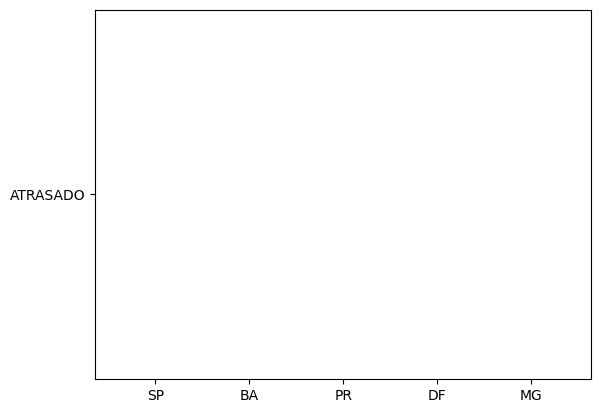

In [69]:
top5_atrasos = df_estado.sort_values(by='status_entrega', ascending=True).head(10)

plt.bar(top5_atrasos['customer_state'], top5_atrasos['status_entrega'], color='yellow')

plt.show()

# Desafio da Semana

Objetivo: Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula. 

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


Submeta uma pasta que contenha: 
- o arquivo .ipynb com sua análise exploratória;
- a base final criada por você no formato .csv;
- as bases da olist em .csv que você utilizou na criação da sua analise exploratória.


obs: 